<a href="https://colab.research.google.com/github/FernandaCorlix/TOPICOSDEIA/blob/main/funcion_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms

x_s = []
y_s = []
z_s = []

def evaluate(ind):
    x, y = ind
    z = (3*(1-x)**2) * np.exp(-x**2 - (y+1)**2) - 10*((x/5) - x**3 - y**5) * np.exp(-x**2 - y**2) - (1/3) * np.exp(-(x+2)**2 - y**2)
    x_s.append(x)
    y_s.append(y)
    z_s.append(z)
    return z,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register('evaluate', evaluate)

poblacion = 50
generaciones = 20
cxpb = 0.7
mutpb = 0.8


population = toolbox.population(n=poblacion)

algorithms.eaMuPlusLambda(population, toolbox, mu=poblacion, lambda_=poblacion, cxpb=0.5, mutpb=0.2, ngen=generaciones, verbose=True)

best_individual = tools.selBest(population, k=1)[0]
best_x, best_y = best_individual

print("Punto más alto encontrado:")
print("x =", best_x)
print("y =", best_y)

x= best_x
y= best_y
print('Valor de la función: ', (3*(1-x)**2) * (np.exp(-x**2 - (y+1)**2)) - (10*((x/5) - x**3 - y**5)) * (np.exp(-x**2 - y**2)) - (1/3) * (np.exp(-(x+1)**2 - y**2)))

gen	nevals
0  	50    
1  	36    
2  	34    
3  	38    
4  	42    
5  	33    
6  	31    
7  	34    
8  	33    
9  	30    
10 	39    
11 	41    
12 	32    
13 	36    
14 	37    
15 	34    
16 	35    
17 	33    
18 	38    
19 	36    
20 	35    
Punto más alto encontrado:
x = -0.009867076920954187
y = 1.5802870873113513
Valor de la función:  8.106192484648076


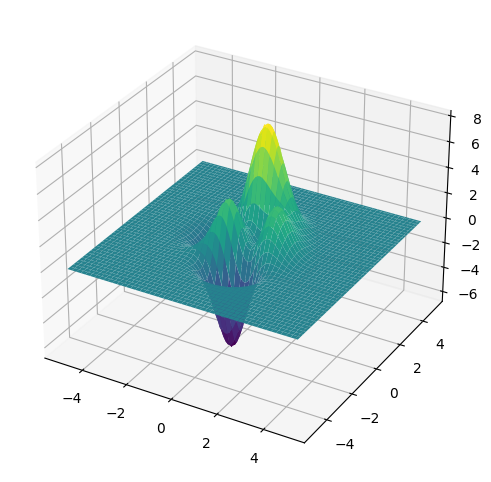

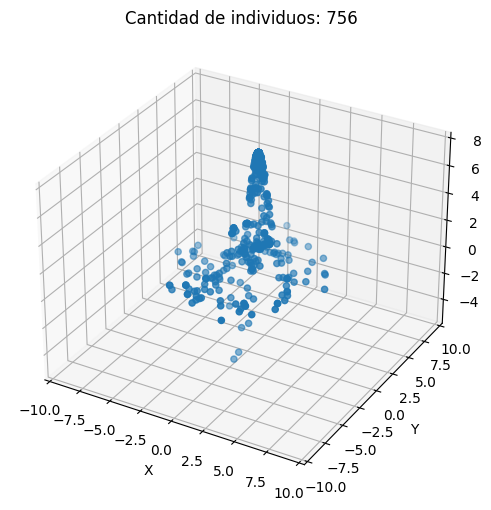

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Función de evaluación
def evaluate(ind):
    x, y = ind
    z = (3*(1-x)**2) * np.exp(-x**2 - (y+1)**2) - 10*((x/5) - x**3 - y**5) * np.exp(-x**2 - y**2) - (1/3) * np.exp(-(x+2)**2 - y**2)
    x_s.append(x)
    y_s.append(y)
    z_s.append(z)
    return z,

# Creación de la población
poblacion = 50
generaciones = 20
cxpb = 0.7
mutpb = 0.8

scat = ax.scatter([], [], [])

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Función para inicializar la animación
def init():
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(min(z_s), max(z_s))
    return scat,

# Función de animación
def update(frame):
    ax.cla()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(min(z_s), max(z_s))
    scat = ax.scatter(x_s[:frame], y_s[:frame], z_s[:frame])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cantidad de individuos: {}'.format(frame))
    return scat,

# Crear la figura y el eje 3D
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = (3*(1-X)**2) * np.exp(-X**2 - (Y+1)**2) - 10*((X/5) - X**3 - Y**5) * np.exp(-X**2 - Y**2) - (1/3) * np.exp(-(X+2)**2 - Y**2)
ax.plot_surface(X, Y, Z, cmap='viridis')
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(x_s), init_func=init, blit=True)

# Guardar la animación como un archivo de video
video_path = "/content/animation.mp4"
ani.save(video_path, writer='ffmpeg')

# Mostrar el video
from IPython.display import Video
Video(video_path)